# 6. Model Analysis

### Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [ ]:
# Load data
df_test = pd.read_csv(r'datasets\test_dataset_reduced_features.csv')
df_train = pd.read_csv(r'datasets\train_dataset_reduced_features.csv')

We can do some deeper analysis into the model so identify its shortcomings and see whether any valuable insights can be gained. 

We first can plot a scatter graph of out predicted results against the true values: 

In [ ]:
# Load predictions
prediction_comparison = pd.read_csv(r'datasets\prediction_comparison.csv')
y_test = prediction_comparison['Price']
y_pred = prediction_comparison['Predicted Price']

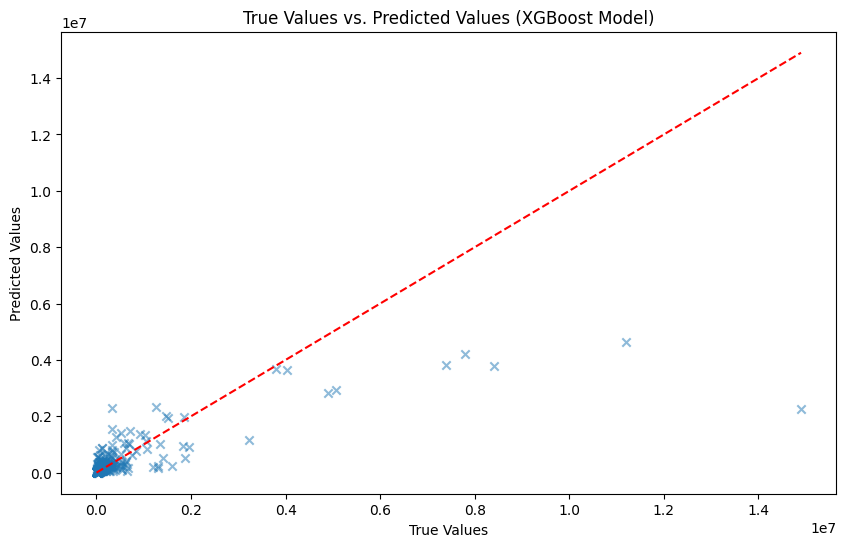

In [ ]:
# Scatter graph for the XGBoost predictions:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, y_pred, marker='x', alpha=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax.set_xlabel('True Values')
ax.set_ylabel('Predicted Values')
ax.set_title('True Values vs. Predicted Values (XGBoost Model)');

We can see above that the model has under-valued the most highly-priced players. 

If we only look at players who have a true value of under 100k, we can also see that the model is massively over-valuing these players:

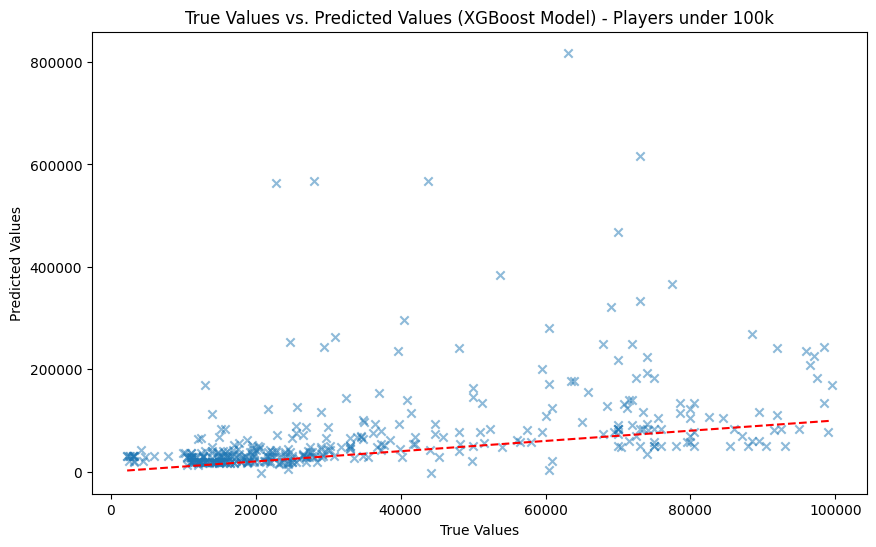

In [ ]:
# Scatter graph for the XGBoost predictions:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test[y_test < 1e5], y_pred[y_test < 1e5], marker='x', alpha=0.5)
ax.plot([y_test[y_test < 1e5].min(), y_test[y_test < 1e5].max()], [y_test[y_test < 1e5].min(), y_test[y_test < 1e5].max()], 'r--')
ax.set_xlabel('True Values')
ax.set_ylabel('Predicted Values')
ax.set_title('True Values vs. Predicted Values (XGBoost Model) - Players under 100k');

We can also look into the most important features for predicting price according to our model:

In [ ]:
# Load the model
with open(r'model\xgbmodel.pkl', 'rb') as file:
    # load the model
    model = pickle.load(file)

# Define X_train
X_train = df_train.drop('Price', axis=1)

Text(0.5, 1.0, 'Feature Importances')

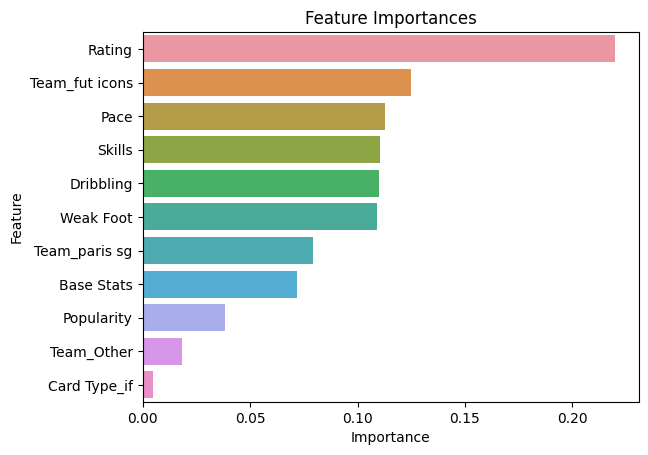

In [ ]:
# Get feature importances based on gain
importances = model.feature_importances_

feature_names = X_train.columns

# Create a dataframe of feature importances
df_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the dataframe by importance in descending order
df_importances = df_importances.sort_values('importance', ascending=False)

# Create a barplot of feature importances
sns.barplot(x='importance', y='feature', data=df_importances)

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')